In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [23]:
df=pd.read_csv("student1.csv")

In [24]:
df.head()

,name,gmat,gpa,exp,admitted,country
0,samir,780,4.0,3,1,Ind
1,kaushal,750,3.9,4,1,Ind
2,nandan,690,3.3,3,0,Ind
3,ankit,710,3.7,5,1,us
4,deepika,680,3.9,4,0,Ind


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      42 non-null     object 
 1   gmat      42 non-null     int64  
 2   gpa       42 non-null     float64
 3   exp       42 non-null     int64  
 4   admitted  42 non-null     int64  
 5   country   42 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.1+ KB


In [26]:
df.isnull().sum()

name        0
gmat        0
gpa         0
exp         0
admitted    0
country     0
dtype: int64

In [27]:
df.drop(["name","country"] ,axis=1 , inplace=True)

In [28]:
X = df.drop("admitted", axis=1)

In [29]:
y = df["admitted"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
X_train.shape

(28, 3)

In [33]:
X_test.shape

(14, 3)

In [34]:
X.shape

(42, 3)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model= KNeighborsClassifier(n_neighbors=3)

In [39]:
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
model.score(X_test , y_test)

0.7142857142857143

In [42]:
y_pred=model.predict(X_test)
y_pred[0:3]

array([1, 1, 1], dtype=int64)

In [44]:
y_test[0:3]

25    1
13    0
8     1
Name: admitted, dtype: int64

In [57]:
model.predict([[650 ,3,3]])

array([1], dtype=int64)

In [82]:
score={}
for i in range(2,11):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train , y_train)
    accuracy = model.score(X_test , y_test)
    score[i]=accuracy

In [83]:
score

{2: 0.7857142857142857,
 3: 0.7142857142857143,
 4: 0.7142857142857143,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6428571428571429,
 8: 0.7142857142857143,
 9: 0.7142857142857143,
 10: 0.7142857142857143}

In [97]:
score=[]
for i in range(2,11):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train , y_train)
    accuracy = model.score(X_test , y_test)
    score.append(accuracy)
score

[0.7857142857142857,
 0.7142857142857143,
 0.7142857142857143,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

In [85]:
import matplotlib.pyplot as plt

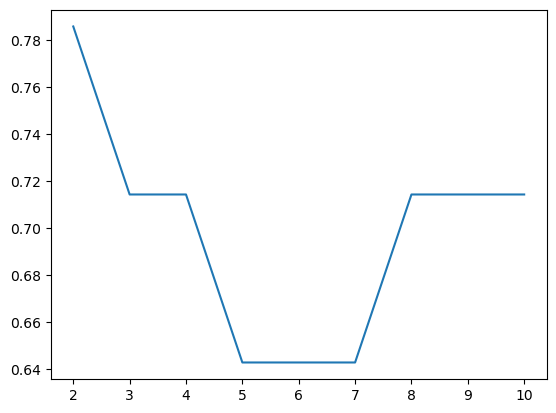

In [89]:
plt.plot(range(2,11), score) # here we pass range for x

In [98]:
from sklearn.metrics import confusion_matrix

In [100]:
cm=confusion_matrix(y_test, y_pred)

In [101]:
cm

array([[3, 4],
       [0, 7]], dtype=int64)

In [102]:
import seaborn as sns

<Axes: >

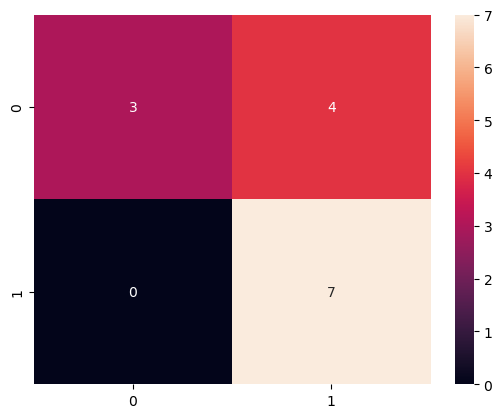

In [103]:
sns.heatmap(cm ,annot=True)